In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(14)
Y = np.random.randint(2, size=100)

scores_base = np.random.rand(100)

# we make R a good predictor, and Rp a bad one
R = scores_base + 0.2 * Y - 0.1 * (1 - Y)
R = np.clip(R, 0, 1)

# Rp = R + 0.1 * np.random.randn(100)
Rp = np.random.rand(100)
Rp = np.clip(Rp, 0, 1)

def compute_roc(scores, Y, threshold):
    tp = np.sum((scores > threshold) & (Y == 1))
    fn = np.sum((scores <= threshold) & (Y == 1))
    fp = np.sum((scores > threshold) & (Y == 0))
    tn = np.sum((scores <= threshold) & (Y == 0))
    
    tpr = tp / (tp + fn) if tp + fn != 0 else 0
    fpr = fp / (fp + tn) if fp + tn != 0 else 0
    
    return tpr, fpr

thresholds = np.linspace(0, 1, 100)
roc_R = [compute_roc(R, Y, t) for t in thresholds]
roc_Rp = [compute_roc(Rp, Y, t) for t in thresholds]

tprs_R, fprs_R = zip(*roc_R)
tprs_Rp, fprs_Rp = zip(*roc_Rp)

dk_values = [abs(tpr_R - tpr_Rp) for tpr_R, tpr_Rp in zip(tprs_R, tprs_Rp)] + \
            [abs(fpr_R - fpr_Rp) for fpr_R, fpr_Rp in zip(fprs_R, fprs_Rp)]

max_dk = max(dk_values)


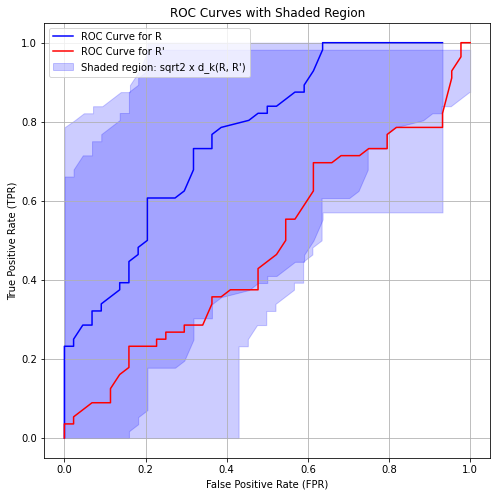

In [15]:
def fill_range(fprs, tprs, max_dk):
    fpr_upper = [min(f + np.sqrt(2) * max_dk, 1) for f in fprs]
    fpr_lower = [max(f - np.sqrt(2) * max_dk, 0) for f in fprs]
    tpr_upper = [min(t + np.sqrt(2) * max_dk, 1) for t in tprs]
    tpr_lower = [max(t - np.sqrt(2) * max_dk, 0) for t in tprs]
    return fpr_lower, fpr_upper, tpr_lower, tpr_upper

fpr_lower, fpr_upper, tpr_lower, tpr_upper = fill_range(fprs_R, tprs_R, max_dk)

fprs_R = np.array(fprs_R)
fpr_upper = np.array(fpr_upper)
tprs_R = np.array(tprs_R)
tpr_upper = np.array(tpr_upper)
fpr_lower = np.array(fpr_lower)
tpr_lower = np.array(tpr_lower)

plt.figure(figsize=(8, 8))
plt.plot(fprs_R, tprs_R, label="ROC Curve for R", color="blue")
plt.plot(fprs_Rp, tprs_Rp, label="ROC Curve for R'", color="red")
plt.fill_between(fprs_R, tpr_lower, tpr_upper, color="blue", alpha=0.2, where=(fpr_upper > fprs_R), interpolate=True, label=f"Shaded region: sqrt2 x d_k(R, R')")
plt.fill_betweenx(tprs_R, fpr_lower, fpr_upper, color="blue", alpha=0.2, where=(tpr_upper > tprs_R), interpolate=True)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves with Shaded Region")
plt.legend()
plt.grid(True)
plt.show()
